In [2]:
#Célula para importação de bibliotecas e APIs


#Conjunto de funções para trabalhar com arquivos
import os
import sys


#Conjunto de funcoes para plot
import matplotlib.pyplot as plt



#Conjunto de funcoes para estrair o pitch
import f0_praat

#Conjunto de funções matemáticas
import numpy


#Conjunto de funcoes auxiliares caso necessário
import auxiliar_codes


#Sci-kit learn
import sklearn





In [2]:
#Célula para lê os diretórios e arquivos a serem utilizados



# The name of the audio file
files_perg = [];

#The name of the directory of audio files
dire_perg = "../Audio_Files/Bruna/Interrogacao_1";


for file in os.listdir(dire_perg):
    if file.endswith(".wav"):
        files_perg.append("/"+file);

files_perg.sort();


tempo_perg = numpy.loadtxt(open("../Dados/tempos_pergunta_1.csv","rb"),delimiter=",")


tempo_perg = tempo_perg*100;
tempo_perg = tempo_perg.astype(int);

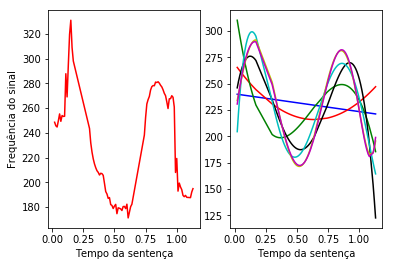

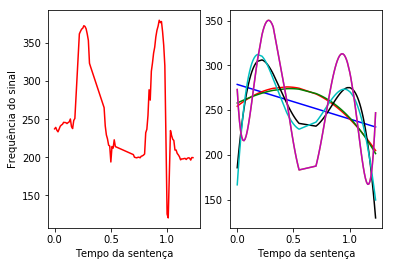

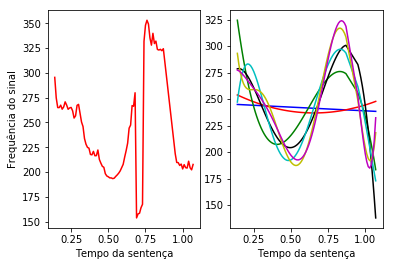

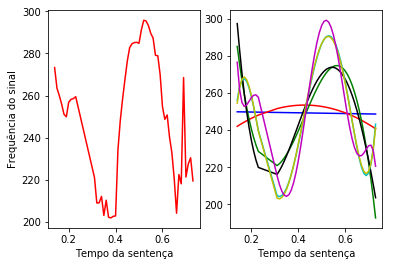

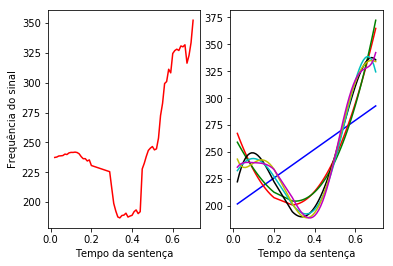

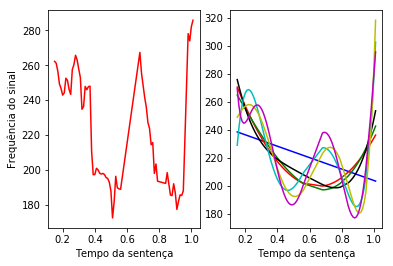

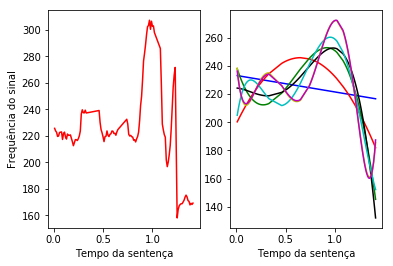

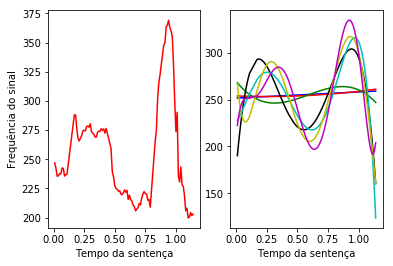

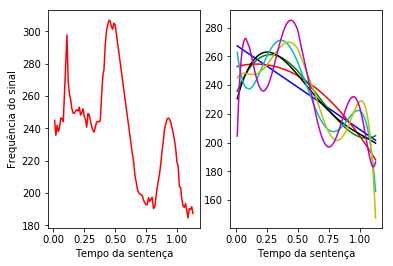

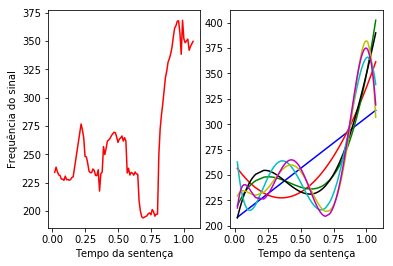

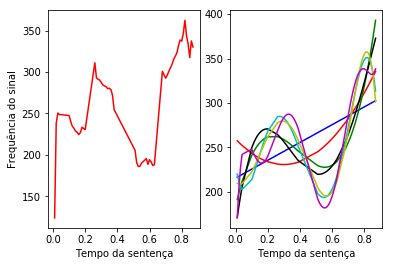

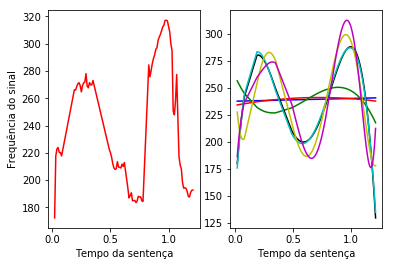

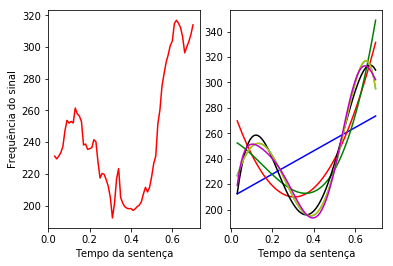

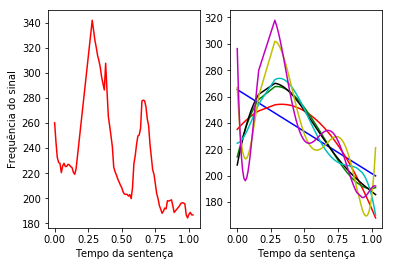

In [51]:
#The base rate
srate = 100.0;

# The pitch range to be used by the pitch extraction algorithm
#pitch_range = (150, 500);
#pitch_range = (40, 500);
pitch_range = (140, 400);

# Parameters for Praat's pitch extraction algorithm
input_parms = {};
input_parms["time_step"]     = 1.0/srate;
input_parms["pitch_floor"]   = pitch_range[0];
input_parms["pitch_ceiling"] = pitch_range[1];

#audio_file=dire_afirm+files_perg[0];


i = 0

p1 = [];
p2 = [];
p3 = [];
p4 = [];
p5 = [];
p6 = [];
p7 = [];

for i in range(0,14):
    t = numpy.arange(0.0,20.0,1/srate)
    audio_file_perg = dire_perg+files_perg[i];

    #  Extract the F0 signal
    (f0_signal_perg,f0_time_perg,f0_parms) = f0_praat.compute_f0_praat(audio_file_perg,input_parms);
    
    t1 = t[range(0,(tempo_perg[i,1] - tempo_perg[i,0]))];
    t2 = t1;
    
    
    arr = f0_signal_perg[range(tempo_perg[i,0],tempo_perg[i,1])];
    
    ex = [];
    for j in range(0,(tempo_perg[i,1] - tempo_perg[i,0])):
        if numpy.isnan(arr[j]):
            ex.append(j);
    
    t1 = numpy.asarray(t1);
    arr = numpy.asarray(arr);
    
    arr = numpy.delete(arr,ex);
    t1 = numpy.delete(t1,ex);
    
    
    p1.append(numpy.polyfit(t1 ,arr ,1));
    p2.append(numpy.polyfit(t1 ,arr ,2));
    p3.append(numpy.polyfit(t1 ,arr ,3));
    p4.append(numpy.polyfit(t1 ,arr ,4));
    p5.append(numpy.polyfit(t1 ,arr ,5));
    p6.append(numpy.polyfit(t1 ,arr ,6));
    p7.append(numpy.polyfit(t1 ,arr ,7));
    
        
    curv1 = numpy.polyval(p1[i],t1)
    curv2 = numpy.polyval(p2[i],t1)
    curv3 = numpy.polyval(p3[i],t1)
    curv4 = numpy.polyval(p4[i],t1)
    curv5 = numpy.polyval(p5[i],t1)
    curv6 = numpy.polyval(p6[i],t1)
    curv7 = numpy.polyval(p7[i],t1)
    
    
    # Plot the F0 signal
    plt.subplot(121);
    plt.plot(t1,arr,'r.');
    plt.ylabel('Frequência do sinal')
    plt.xlabel('Tempo da sentença')

    
    plt.subplot(122)
    plot1 = plt.plot(t1,curv1,'b.',label="Regressão de ordem 1")
    plot2 = plt.plot(t1,curv2,'r.',label="Regressão de ordem 2")
    plot3 = plt.plot(t1,curv3,'g.',label="Regressão de ordem 3")
    plot4 = plt.plot(t1,curv4,'k.',label="Regressão de ordem 4")
    plot5 = plt.plot(t1,curv5,'c.',label="Regressão de ordem 5")
    plot6 = plt.plot(t1,curv6,'y.',label="Regressão de ordem 6")
    plot7 = plt.plot(t1,curv7,'m.',label="Regressão de ordem 7")
    
    

    #plt.legend(loc='upper right', mode="expand", borderaxespad=0.)
 

   # plt.ylabel('Frequência do sinal')
    plt.xlabel('Tempo da sentença')
   
    plt.show();
#    plt.ylabel('Frequência do sinal')
 #   plt.xlabel('Tempo da sentença')


In [45]:
i = 0

t1 = t[range(0,(tempo_perg[i,1] - tempo_perg[i,0]))];
    
curv1 = numpy.polyval(p1[i],t1)
curv2 = numpy.polyval(p2[i],t1)
curv3 = numpy.polyval(p3[i],t1)
curv4 = numpy.polyval(p4[i],t1)
curv5 = numpy.polyval(p5[i],t1)
curv6 = numpy.polyval(p6[i],t1)
curv7 = numpy.polyval(p7[i],t1)


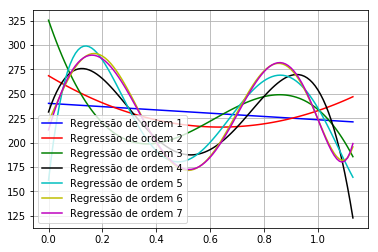

In [46]:
plot1 = plt.plot(t1,curv1,'b-',label="Regressão de ordem 1")
plot2 = plt.plot(t1,curv2,'r-',label="Regressão de ordem 2")
plot3 = plt.plot(t1,curv3,'g-',label="Regressão de ordem 3")
plot4 = plt.plot(t1,curv4,'k-',label="Regressão de ordem 4")
plot5 = plt.plot(t1,curv5,'c-',label="Regressão de ordem 5")
plot6 = plt.plot(t1,curv6,'y-',label="Regressão de ordem 6")
plot7 = plt.plot(t1,curv7,'m-',label="Regressão de ordem 7")


plt.legend(loc='upper right', mode="expand", borderaxespad=0.)
plt.grid("on");
plt.legend()
plt.show();

t3

In [30]:
i

1

In [36]:
t1

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.28,
        0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,  0.37,
        0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,  0.46,
        0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,  0.55,
        0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,  0.64,
        0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,  0.73,
        0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,  0.82,
        0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.93,  0.94,
        0.95,  0.96,  0.97,  0.98,  0.99,  1.  ,  1.01,  1.02,  1.03])

In [18]:
arr = numpy.arange(28)
numpy.random.permutation(arr)

array([23, 19,  0, 25,  4, 10, 18, 11,  6, 22, 14,  9,  7, 16, 21,  2, 26,
        5,  8,  3, 27, 17, 13, 15,  1, 24, 12, 20])

In [19]:
arr = numpy.arange(28)
numpy.random.permutation(arr)

array([24,  5, 15, 25, 16, 19, 14,  0, 13, 10,  4, 12,  7,  9, 18,  6, 26,
       27, 23, 17,  8, 11,  2, 21, 22, 20,  1,  3])

In [20]:
arr = numpy.arange(28)
numpy.random.permutation(arr)

array([26, 27, 17,  9, 21, 13, 19,  1, 12,  7, 10, 22,  2,  8, 14, 20, 24,
        4, 15,  5, 25,  3,  6, 11, 23, 16,  0, 18])

In [21]:
arr = numpy.arange(28)
numpy.random.permutation(arr)

array([24, 27,  7, 20, 16, 22, 18, 26, 10,  1, 12,  4, 17, 21, 25,  6,  3,
       14, 11, 23, 13,  8, 15, 19,  2,  5,  9,  0])

In [22]:
arr = numpy.arange(28)
numpy.random.permutation(arr)

array([16, 24,  6, 20,  1, 10, 13, 15,  0, 14, 12, 11, 25, 26, 27, 21, 17,
        2, 23,  9, 19, 18,  3,  4,  8, 22,  7,  5])

In [14]:
arr = numpy.arange(5).reshape((14,5));

ValueError: cannot reshape array of size 5 into shape (14,5)

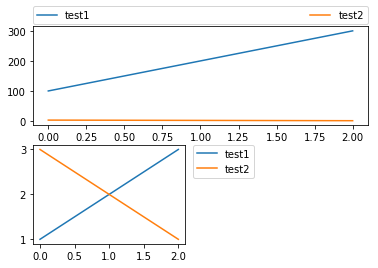

In [7]:
plt.subplot(211)
plt.plot([100,200,300], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()